In [2]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
##구글드라이브 권한 획득
!apt install -y -qq --fix-broken python-pycurl python-apt 2> /dev/null
!apt install -y -qq software-properties-common module-init-tools 2> /dev/null
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt update -qq 2>&1 > /dev/null
!apt install -y -qq google-drive-ocamlfuse fuse 2> /dev/null

from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
creds = GoogleCredentials.get_application_default()

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

from getpass import getpass

vcode = getpass()

!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}



Suggested packages:
  python-apt-dbg python-apt-doc libcurl4-gnutls-dev python-pycurl-dbg
  python-pycurl-doc
The following NEW packages will be installed:
  python-apt python-pycurl
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 194 kB of archives.
After this operation, 873 kB of additional disk space will be used.
Selecting previously unselected package python-apt.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../python-apt_1.6.5ubuntu0.5_amd64.deb ...
Unpacking python-apt (1.6.5ubuntu0.5) ...
Selecting previously unselected package python-pycurl.
Preparing to unpack .../python-pycurl_7.43.0.1-0.2_amd64.deb ...
Unpacking python-pycurl (7.43.0.1-0.2) ...
Setting up python-pycurl (7.43.0.1-0.2) ...
Setting up python-apt (1.6.5ubuntu0.5) ...
software-properties-common is already the newest version (0.96.24.32.14).
module-init-tools is already the newest version (24-1ubuntu3.5).
0 upgraded, 0 newly installed, 0 

In [5]:
#drive에 경로 생성
!mkdir -p google_drive
!google-drive-ocamlfuse -o nonempty google_drive

In [25]:
#csv파일 불러오기(userOwned)

df = pd.read_csv("google_drive/steamData/userOwnedResult.csv")
df

,Unnamed: 0,appid,playtime_forever,playtime_2weeks,steamid,weight,newsteamid
0,0,10,0,NaN,76561197960265744,1,0
1,1,919670,0,NaN,76561197960265744,1,0
2,2,257510,279,NaN,76561197960265744,3,0
3,3,319630,0,NaN,76561197960265744,1,0
4,4,45740,0,NaN,76561197960265744,1,0
...,...,...,...,...,...,...,...
1913347,1913347,214950,0,NaN,76561197964555948,1,8397
1913348,1913348,254320,0,NaN,76561197964555948,1,8397
1913349,1913349,243450,0,NaN,76561197964555948,1,8397
1913350,1913350,255370,3,NaN,76561197964555948,2,8397


In [26]:
applist = pd.read_csv("google_drive/steamData/applist.csv")
applist

,appid,name
0,216938,Pieterw test app76 ( 216938 )
1,660010,test2
2,660130,test3
3,1118314,NaN
4,485070,Dyna Bomb Demo
...,...,...
111304,1052230,CONCLUSE 2
111305,1371580,Myth of Empires
111306,1163140,Shanghai Office Simulator
111307,1101910,Warriors: Rise to Glory! Online Multiplayer Op...


In [27]:
#데이터셋의 유저 수
df['steamid'].unique().size

8398

In [28]:
#그룹 집계
grouped = df.groupby(df['steamid'])
grouped.count()

,Unnamed: 0,appid,playtime_forever,playtime_2weeks,weight,newsteamid
steamid,,,,,,
76561197960265744,188,188,188,0,188,188
76561197960265754,1917,1917,1917,2,1917,1917
76561197960265763,1396,1396,1396,0,1396,1396
76561197960265778,833,833,833,3,833,833
76561197960265822,355,355,355,1,355,355
...,...,...,...,...,...,...
76561197964555326,50,50,50,0,50,50
76561197964555576,31,31,31,2,31,31
76561197964555626,9,9,9,1,9,9


In [29]:
#단일 유저 정보 
sortedUser = df.groupby('steamid').get_group(76561197960265827).sort_values(by = ['playtime_forever'], ascending = False)
sortedUser = sortedUser[sortedUser.playtime_forever != 0]
sortedUser.head(20)

,Unnamed: 0,appid,playtime_forever,playtime_2weeks,steamid,weight,newsteamid
4717,4717,10,15070,NaN,76561197960265827,4,5
4694,4694,730,12678,NaN,76561197960265827,4,5
4734,4734,550,2811,NaN,76561197960265827,4,5
4726,4726,240,1621,NaN,76561197960265827,4,5
4691,4691,252950,772,NaN,76561197960265827,4,5
4725,4725,220,622,NaN,76561197960265827,4,5
4708,4708,739630,296,NaN,76561197960265827,3,5
4706,4706,391220,212,NaN,76561197960265827,3,5
4702,4702,232090,174,NaN,76561197960265827,3,5
4704,4704,418460,158,NaN,76561197960265827,3,5


In [30]:
#플레이시간 시간단위 분할
sortedUser['playtime_forever'] =sortedUser['playtime_forever']/60
sortedUser.head()

,Unnamed: 0,appid,playtime_forever,playtime_2weeks,steamid,weight,newsteamid
4717,4717,10,251.166667,NaN,76561197960265827,4,5
4694,4694,730,211.300000,NaN,76561197960265827,4,5
4734,4734,550,46.850000,NaN,76561197960265827,4,5
4726,4726,240,27.016667,NaN,76561197960265827,4,5
4691,4691,252950,12.866667,NaN,76561197960265827,4,5


In [31]:
merged = pd.merge(sortedUser, applist, on = 'appid')
merged

,Unnamed: 0,appid,playtime_forever,playtime_2weeks,steamid,weight,newsteamid,name
0,4717,10,251.166667,NaN,76561197960265827,4,5,Counter-Strike
1,4694,730,211.300000,NaN,76561197960265827,4,5,Counter-Strike: Global Offensive
2,4734,550,46.850000,NaN,76561197960265827,4,5,Left 4 Dead 2
3,4726,240,27.016667,NaN,76561197960265827,4,5,Counter-Strike: Source
4,4691,252950,12.866667,NaN,76561197960265827,4,5,Rocket League
5,4725,220,10.366667,NaN,76561197960265827,4,5,Half-Life 2
6,4708,739630,4.933333,NaN,76561197960265827,3,5,Phasmophobia
7,4706,391220,3.533333,NaN,76561197960265827,3,5,Rise of the Tomb Raider
8,4702,232090,2.900000,NaN,76561197960265827,3,5,Killing Floor 2
9,4704,418460,2.633333,NaN,76561197960265827,3,5,Rising Storm 2: Vietnam


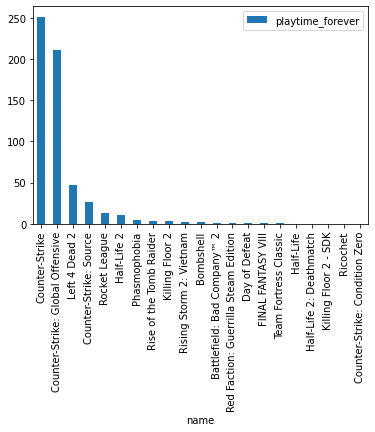

In [32]:
#시각화
merged.plot(kind='bar', x='name', y='playtime_forever')
plt.show()

In [33]:
#플레이시간에 log 적용
merged['playtime_forever'] = np.log10(merged['playtime_forever'])
merged.head()

,Unnamed: 0,appid,playtime_forever,playtime_2weeks,steamid,weight,newsteamid,name
0,4717,10,2.399962,NaN,76561197960265827,4,5,Counter-Strike
1,4694,730,2.324899,NaN,76561197960265827,4,5,Counter-Strike: Global Offensive
2,4734,550,1.670710,NaN,76561197960265827,4,5,Left 4 Dead 2
3,4726,240,1.431632,NaN,76561197960265827,4,5,Counter-Strike: Source
4,4691,252950,1.109466,NaN,76561197960265827,4,5,Rocket League


In [34]:
#음수값 제거(플레이시간 1시간 미만 제거)
merged = merged[merged['playtime_forever'] >= 0]
merged.tail()

,Unnamed: 0,appid,playtime_forever,playtime_2weeks,steamid,weight,newsteamid,name
7,4706,391220,0.548185,NaN,76561197960265827,3,5,Rise of the Tomb Raider
8,4702,232090,0.462398,NaN,76561197960265827,3,5,Killing Floor 2
9,4704,418460,0.420506,NaN,76561197960265827,3,5,Rising Storm 2: Vietnam
10,4701,353190,0.208620,NaN,76561197960265827,3,5,Bombshell
11,4735,24960,0.066947,NaN,76561197960265827,3,5,Battlefield: Bad Company™ 2


In [35]:
#값 분포
np.percentile(merged['playtime_forever'],[0, 25, 50, 75, 100], interpolation='nearest')

array([0.06694679, 0.462398  , 1.01563913, 1.43163176, 2.399962  ])

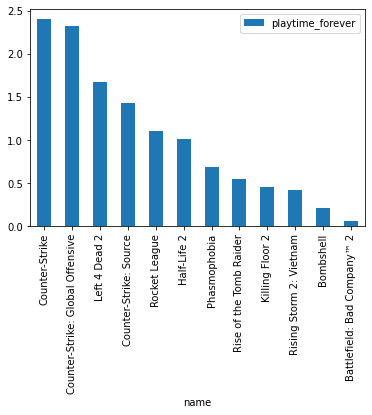

In [36]:
#시각화
merged.plot(kind='bar', x='name', y='playtime_forever')
plt.show()